# Multiple Linear Regression from Scratch

This notebook implements **multiple linear regression** from scratch using gradient descent algorithm. We'll build a model to predict income based on age and experience using two independent variables.

## Overview
- Load and explore the income dataset
- Visualize relationships between variables
- Implement loss functions (MSE, MAE, R²)
- Implement gradient descent for multiple variables
- Train the model and evaluate performance
- Visualize the results

## Mathematical Foundation
The multiple linear regression equation is:
**Income = a × Age + b × Experience + c**

Where:
- **a, b** are the coefficients (weights) for age and experience
- **c** is the intercept (bias term)
- We'll use gradient descent to find optimal values for a, b, and c

## Import Required Libraries

We'll import the necessary libraries for data manipulation and visualization:
- **pandas**: For data loading, manipulation, and DataFrame operations
- **matplotlib.pyplot**: For creating scatter plots and visualizations

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset Source

**Dataset**: Multiple Linear Regression Dataset  
**Source**: [Kaggle - Multiple Linear Regression Dataset](https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset)

This dataset contains information about:
- **Age**: Age of individuals
- **Experience**: Years of work experience  
- **Income**: Annual income (target variable)

**Dataset Link**: https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset

## Load the Dataset

Load the income dataset from CSV file and examine its structure to understand the data we're working with.

In [19]:
income = pd.read_csv('data/income.csv')
income.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


## Data Preprocessing

Restructure the data into a more convenient format for our regression model:
- **x**: Age (first independent variable)
- **y**: Experience (second independent variable)  
- **z**: Income (dependent variable/target)

In [20]:
data = pd.DataFrame({
    "x": income['age'],
    'y':income["experience"],
    'z': income["income"]
})
data.head()

,x,y,z
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


## Explore the Dataset

Let's examine the size and structure of our dataset to understand what we're working with.

In [21]:
data.size

60

## Data Visualization

Let's create scatter plots to visualize the relationships between variables. This helps us understand:
1. **Age vs Experience**: How these independent variables relate to each other
2. **Age vs Income**: The relationship between age and income
3. **Experience vs Income**: The relationship between experience and income

These visualizations will help us understand if linear relationships exist in our data.

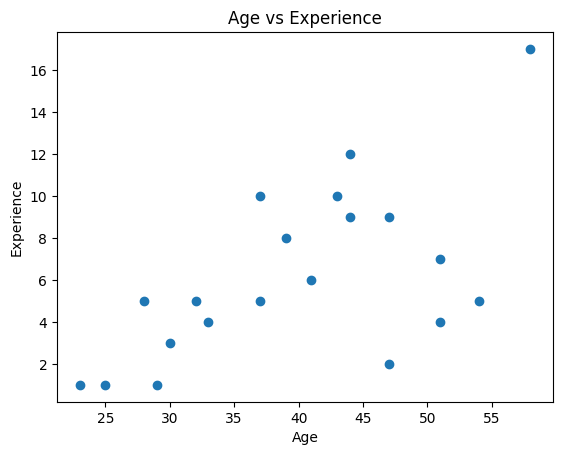

In [22]:
plt.scatter(data['x'], data['y'])
plt.xlabel('Age')
plt.ylabel('Experience')
plt.title('Age vs Experience')
plt.show()

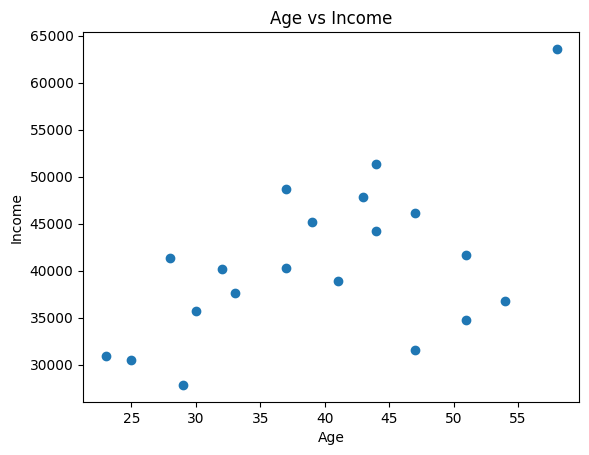

In [23]:
plt.scatter(data['x'],data['z'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

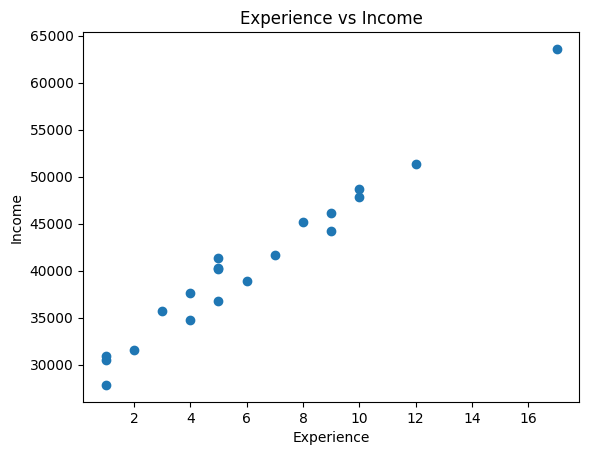

In [24]:
plt.scatter(data['y'], data['z'])
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Experience vs Income')
plt.show()

## Evaluation Metrics Implementation

We'll implement three important evaluation metrics to assess our model's performance:

### 1. Mean Squared Error (MSE)
- Measures the average squared difference between actual and predicted values
- Formula: MSE = (1/n) × Σ(y_actual - y_predicted)²
- Lower values indicate better performance

### 2. Mean Absolute Error (MAE) 
- Measures the average absolute difference between actual and predicted values
- Formula: MAE = (1/n) × Σ|y_actual - y_predicted|
- More robust to outliers than MSE

### 3. R-squared (Coefficient of Determination)
- Measures how well the model explains the variance in the data
- Formula: R² = 1 - (SS_res / SS_tot)
- Values closer to 1 indicate better model fit

In [25]:
def MSE(a,b,c, data):
    total_loss = 0
    for i in range(len(data)):
        x = data.iloc[i]['x']
        y = data.iloc[i]['y']
        z = data.iloc[i]['z']
        predicted_z = a * x + b * y + c
        total_loss += (predicted_z - z) ** 2
    return total_loss / len(data)

In [26]:
def MAE(a, b, c, data):
    total_loss = 0
    for i in range(len(data)):
        x = data.iloc[i]['x']
        y = data.iloc[i]['y']
        z = data.iloc[i]['z']
        predicted_z = a * x + b * y + c
        total_loss += abs(predicted_z - z)
    return total_loss / len(data)

In [27]:
def r_squared(a, b, c, data):
    z_mean = data['z'].mean()
    ss_tot = 0
    for i in range(len(data)):
        z_actual = data.iloc[i]['z']
        ss_tot += (z_actual - z_mean) ** 2
    ss_res = 0
    for i in range(len(data)):
        x = data.iloc[i]['x']
        y = data.iloc[i]['y']
        z_actual = data.iloc[i]['z']
        z_predicted = a * x + b * y + c
        ss_res += (z_actual - z_predicted) ** 2
    r2 = 1 - (ss_res / ss_tot)
    return r2

## Gradient Descent Implementation

Implement gradient descent algorithm for multiple linear regression. This optimization algorithm finds the best values for our parameters (a, b, c).

### How it works:
1. **Calculate gradients**: Partial derivatives of the loss function with respect to each parameter
2. **Update parameters**: Move in the direction opposite to the gradient
3. **Repeat**: Continue until convergence

### Gradient formulas:
- **a_gradient** = -(2/n) × Σ[x × (z_actual - z_predicted)]
- **b_gradient** = -(2/n) × Σ[y × (z_actual - z_predicted)]  
- **c_gradient** = -(2/n) × Σ(z_actual - z_predicted)

### Parameter updates:
- **a_new** = a_now - (learning_rate × a_gradient)
- **b_new** = b_now - (learning_rate × b_gradient)
- **c_new** = c_now - (learning_rate × c_gradient)

In [28]:
def gradient_descent(a_now, b_now, c_now, data, lr):
    a_gradient = 0
    b_gradient = 0
    c_gradient = 0
    n = len(data)
    for i in range(n):
        x = data.iloc[i]['x']
        y = data.iloc[i]['y']
        z = data.iloc[i]['z']
        a_gradient += -(2/n) * x * (z - (a_now * x + b_now * y + c_now))
        b_gradient += -(2/n) * y * (z - (a_now * x + b_now * y + c_now))
        c_gradient += -(2/n) * (z - (a_now * x + b_now * y + c_now))
    a_new = a_now - lr * a_gradient
    b_new = b_now - lr * b_gradient
    c_new = c_now - lr * c_gradient
    return a_new, b_new, c_new

## Initialize Parameters

Set up the initial parameters for our multiple linear regression model:

- **a**: Coefficient for age (initialized to 0.0)
- **b**: Coefficient for experience (initialized to 0.0)  
- **c**: Intercept/bias term (initialized to 0.0)
- **learning_rate**: Controls the step size during optimization (0.0005)

The learning rate is crucial - too high and the algorithm may overshoot the minimum, too low and it will converge very slowly.

In [29]:
a = 0.0
b = 0.0
c = 0.0


In [30]:
learning_rate = 0.0005

## Train the Model

Now we'll train our multiple linear regression model using gradient descent:

### Training Process:
1. **Run for 50,000 epochs** to ensure convergence
2. **Monitor progress** by printing MSE every 10,000 epochs
3. **Update parameters** (a, b, c) using gradient descent in each iteration
4. **Visualize results** with scatter plot and prediction line

### Expected outcome:
- MSE should decrease over time, indicating the model is learning
- Final parameters will define our income prediction equation
- The red line shows the model's predictions against actual data

Epoch 0, MSE: 912787805.1751556, a: 1657.952, b: 285.107, c: 40.7355
Epoch 10000, MSE: 19513383.186037175, a: 399.90408805016114, b: 1788.283971853262, c: 12818.199889387659
Epoch 10000, MSE: 19513383.186037175, a: 399.90408805016114, b: 1788.283971853262, c: 12818.199889387659
Epoch 20000, MSE: 7788115.913053872, a: 195.17287828376962, b: 1941.7485494018301, c: 20383.742311606922
Epoch 20000, MSE: 7788115.913053872, a: 195.17287828376962, b: 1941.7485494018301, c: 20383.742311606922
Epoch 30000, MSE: 3709334.196548524, a: 74.42266428353787, b: 2032.261767203792, c: 24845.889863771557
Epoch 30000, MSE: 3709334.196548524, a: 74.42266428353787, b: 2032.261767203792, c: 24845.889863771557
Epoch 40000, MSE: 2290478.6682631015, a: 3.2043375919821306, b: 2085.6463509802784, c: 27477.658964531718
Epoch 40000, MSE: 2290478.6682631015, a: 3.2043375919821306, b: 2085.6463509802784, c: 27477.658964531718


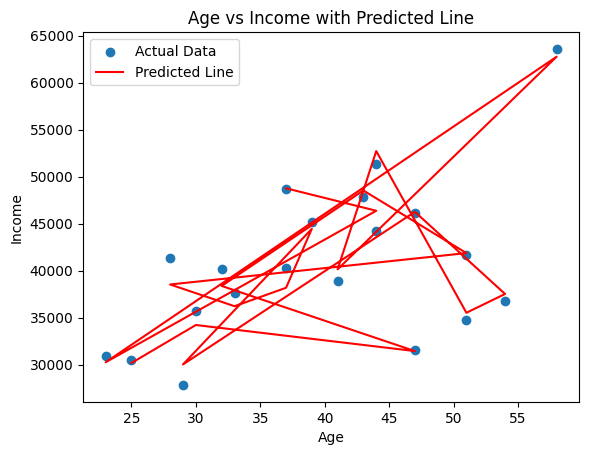

In [31]:
epochs = 50000
for epoch in range(epochs):
    a, b, c = gradient_descent(a, b, c, data, learning_rate)
    if epoch % 10000 == 0:
        loss = MSE(a, b, c, data)
        print(f'Epoch {epoch}, MSE: {loss}, a: {a}, b: {b}, c: {c}')
plt.scatter(data['x'], data['z'], label='Actual Data')
x_values = data['x']
predicted_z = a * x_values + b * data['y'] + c
plt.plot(x_values, predicted_z, color='red', label='Predicted Line')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income with Predicted Line')
plt.legend();

## Additional Visualizations

Let's create additional plots to better understand our model's performance:

### Experience vs Income Plot
This visualization shows how our model predicts income based on experience, while keeping age constant. The red line represents the model's predictions.

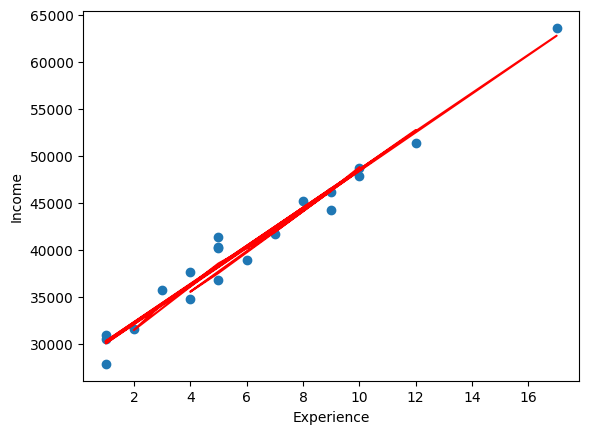

In [32]:
plt.scatter(data['y'], data['z'], label='Actual Data')
y_values = data['y']
predicted_z = a * data['x'] + b * y_values + c
plt.plot(y_values, predicted_z, color='red', label='Predicted Line')
plt.xlabel('Experience')
plt.ylabel('Income');

### Age vs Income Plot
This plot shows the relationship between age and income, with our model's predictions overlaid as a red line.

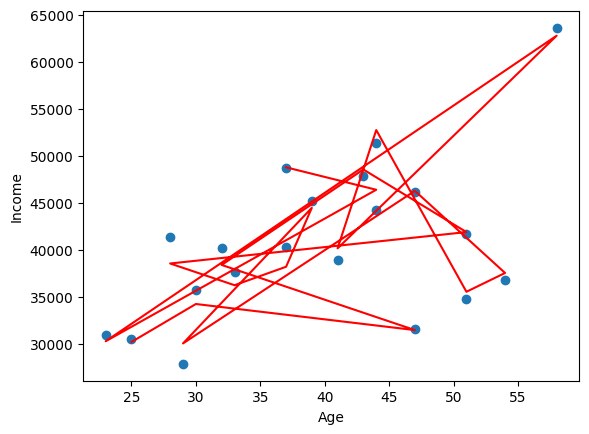

In [33]:
plt.scatter(data['x'], data['z'], label='Actual Data')
x_values = data['x']
predicted_z = a * x_values + b * data['y'] + c
plt.plot(x_values, predicted_z, color='red', label='Predicted Line')
plt.xlabel('Age')
plt.ylabel('Income');

## Final Model Evaluation

Let's evaluate our trained model using all the metrics we implemented:

### What to expect:
- **Final parameters**: The learned coefficients a, b, and c
- **MSE**: Mean Squared Error - lower is better
- **RMSE**: Root Mean Squared Error - in the same units as income
- **MAE**: Mean Absolute Error - average prediction error
- **R²**: Coefficient of determination - closer to 1 means better fit

### Model Equation:
Once trained, our model will be: **Income = a × Age + b × Experience + c**

In [34]:
print(f'Final parameters: a = {a:.6f}, b = {b:.6f}, c = {c:.6f}')
print(f'Final model equation: Income = {a:.6f} × Age + {b:.6f} × Experience + {c:.6f}')
print()
mse = MSE(a, b, c, data)
rmse = mse ** 0.5
mae = MAE(a, b, c, data)
r2 = r_squared(a, b, c, data)
print('Model Performance Metrics:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.4f}')


Final parameters: a = -38.796955, b = 2117.130122, c = 29029.755284
Final model equation: Income = -38.796955 × Age + 2117.130122 × Experience + 29029.755284

Model Performance Metrics:
Mean Squared Error (MSE): 1796939.73
Root Mean Squared Error (RMSE): 1340.50
Mean Absolute Error (MAE): 1089.70
R-squared (R²): 0.9734
